In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [319]:
df = pd.read_csv('Masterfile.csv')
df = df[['IsRegisteredUser', 'YearsInPM', 'PreferredCountry', 'Male', 'Female','RegisteredUserCreateDate', 'PMCOMUserFirstVisit',
         'PMCOMUserLastVisit', 'PreferredRegion', "PreferredStateProvince", "HomeChapterName", "PMCOMUserLastUpdate", "PMCOMUserCompanySize", "IsRegisteredUser"]]





In [320]:
df.isnull().values.sum()

2301

In [321]:
df.apply(lambda x: sum(x.isnull()),axis=0)

IsRegisteredUser              0
YearsInPM                   865
PreferredCountry              0
Male                          0
Female                        0
RegisteredUserCreateDate      0
PMCOMUserFirstVisit           0
PMCOMUserLastVisit            0
PreferredRegion             334
PreferredStateProvince      108
HomeChapterName             482
PMCOMUserLastUpdate           0
PMCOMUserCompanySize        512
IsRegisteredUser              0
dtype: int64

In [322]:
df.describe()

,IsRegisteredUser,Male,Female,RegisteredUserCreateDate,PMCOMUserFirstVisit,PMCOMUserLastVisit,PMCOMUserLastUpdate,PMCOMUserCompanySize,IsRegisteredUser
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,388.000000,900.000000
mean,0.657778,0.175556,0.185556,791.065556,22.686222,16.304333,16.162444,9616.237113,0.657778
std,0.474717,0.380653,0.388964,978.286399,43.810611,35.334274,33.323421,12214.010859,0.474717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000
50%,1.000000,0.000000,0.000000,320.500000,0.000000,0.000000,0.000000,3000.000000,1.000000
75%,1.000000,0.000000,0.000000,1388.500000,22.400000,12.025000,14.100000,15000.000000,1.000000
max,1.000000,1.000000,1.000000,5335.000000,206.300000,193.500000,172.200000,30000.000000,1.000000


In [323]:
df2.corr()

,Male,Female,RegisteredUserCreateDate,PMCOMUserFirstVisit,PMCOMUserLastVisit,PMCOMUserLastUpdate,PMCOMUserCompanySize,IsRegisteredUser
Male,1.000000,-0.220259,0.159305,-0.165293,-0.161805,-0.162921,-0.000348,0.154330
Female,-0.220259,1.000000,-0.084827,-0.185187,-0.175914,-0.171502,0.132482,0.163562
RegisteredUserCreateDate,0.159305,-0.084827,1.000000,-0.174518,-0.200318,-0.186903,-0.067176,0.583583
PMCOMUserFirstVisit,-0.165293,-0.185187,-0.174518,1.000000,0.875515,0.805751,0.046284,-0.469000
PMCOMUserLastVisit,-0.161805,-0.175914,-0.200318,0.875515,1.000000,0.803483,0.041985,-0.487841
PMCOMUserLastUpdate,-0.162921,-0.171502,-0.186903,0.805751,0.803483,1.000000,0.033986,-0.460822
PMCOMUserCompanySize,-0.000348,0.132482,-0.067176,0.046284,0.041985,0.033986,1.000000,-0.006982
IsRegisteredUser,0.154330,0.163562,0.583583,-0.469000,-0.487841,-0.460822,-0.006982,1.000000


In [338]:
#fill missing values 
#df = df.drop(['ID'], axis = 1)
df1 = df.fillna(method = 'pad')
df2 = df1.iloc[:, 1: 615]
df3 = df2.astype(str, errors = 'ignore')

In [339]:
df3 = df3.dropna(how = 'any',axis='columns', thresh = 3)

In [340]:
df3

,YearsInPM,PreferredCountry,Male,Female,RegisteredUserCreateDate,PMCOMUserFirstVisit,PMCOMUserLastVisit,PreferredRegion,PreferredStateProvince,HomeChapterName,PMCOMUserLastUpdate,PMCOMUserCompanySize,IsRegisteredUser
0,nan,USA,0,0,233,16.6,1.6,nan,FL,nan,16.6,7500.0,1
1,nan,USA,0,0,0,44.2,41.0,nan,AZ,nan,44.2,750.0,0
2,nan,0,0,1,176,20.5,1.6,nan,XX,nan,3.8,300.0,1
3,nan,USA,0,0,0,94.7,94.7,nan,OH,nan,94.7,30000.0,0
4,nan,USA,0,0,0,15.6,13.9,nan,CO,nan,9.3,300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,10 to 19,USA,0,0,0,185.7,132.9,Northern America,NY,PMI Minnesota Chapter,0.0,3000.0,0
896,10 to 19,USA,0,0,0,201.3,157.9,Northern America,CA,PMI Minnesota Chapter,85.9,3000.0,0
897,10 to 19,USA,0,0,0,193.5,193.5,Northern America,AZ,PMI Minnesota Chapter,0.0,3000.0,0
898,10 to 19,USA,0,0,3249,194.2,1.6,Northern America,IN,PMI Minnesota Chapter,26.8,300.0,1


In [341]:
df3.YearsInPM = df3.YearsInPM.replace('nan', '0 to 2')

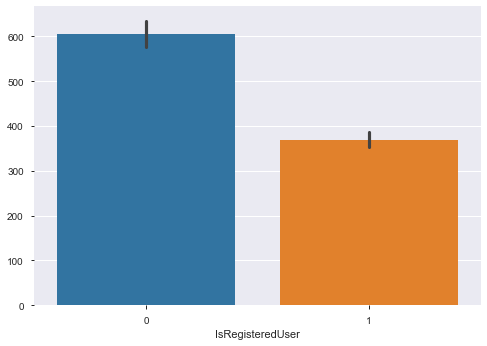

In [342]:

from pylab import savefig
isreg = sns.barplot(
    data=df3, x = 'IsRegisteredUser', y = df2.IsRegisteredUser.index, 
)

figure = isreg.get_figure()
figure.savefig('isreg.png', dpi=400)


In [ ]:

from pylab import savefig
vv = sns.barplot(
    data=df3, x = 'Male', y = 'PMCOMUserLastVisit',
)

figure = vv.get_figure()
figure.savefig('vv.png', dpi=400)


In [ ]:
from pylab import savefig
vv = sns.lineplot(
    data=df3, x = 'PMCOMUserLastVisit', y = 'Male', 
)

figure = vv.get_figure()
figure.savefig('vv.png', dpi=400)

In [ ]:


yy = sns.barplot(
    data=df3, x = 'YearsInPM', y = df2.YearsInPM.index
)

figure = yy.get_figure()
figure.savefig('yy.png', dpi=400)


In [ ]:


cc = sns.barplot(
    data=df2, x = 'PreferredCountry', y = df2['PreferredCountry'].index
)
figure = cc.get_figure()
figure.savefig('cc.png', dpi=400)


g = sns.catplot(
    data=df2, kind="bar",
    x = 'PreferredCountry', y = 'IsRegisteredUser', hue="IsRegisteredUser",
    ci="sd", palette="dark", alpha=.6, height=6)




In [ ]:
sex = df2[['Male', 'Female']]

sex = sns.catplot(
    data=sex, kind="bar")





In [ ]:
dd = df2['PreferredCountry']
dd.value_counts()



# Descriptive statistics and Distribution.


In [ ]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [344]:
uservisitagg = df2['PMCOMUserFirstVisit'] - df2['PMCOMUserLastVisit']


statistics(uservisitagg)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
NaN,6.381889,21.371706,0.0,456.749839


In [345]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

df3 = df3.apply(LabelEncoder().fit_transform)

In [346]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df3)


In [347]:
from sklearn.decomposition import PCA 
pca = PCA(2)  
projected = pca.fit_transform(df3)
print(df3.shape)
print(projected.shape)


(900, 13)
(900, 2)


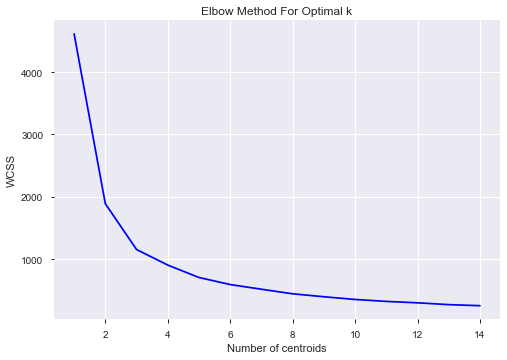

In [348]:
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [349]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=23)

# Fit and predict 
y_means = kmeans.fit_predict(projected)

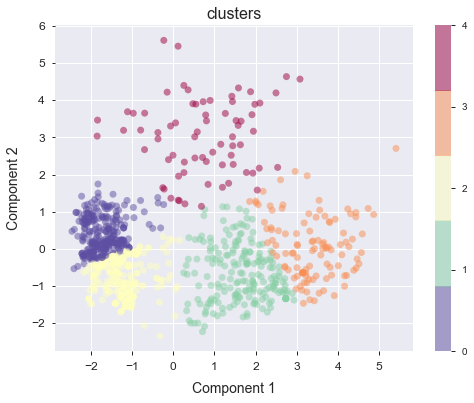

<Figure size 576x396 with 0 Axes>

In [350]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('clusters', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()
plt.savefig('cluster.png')

In [351]:
fir = df2[33:34]
fir.fillna(0)

,YearsInPM,PreferredCountry,Male,Female,RegisteredUserCreateDate,PMCOMUserFirstVisit,PMCOMUserLastVisit,PreferredRegion,PreferredStateProvince,HomeChapterName,PMCOMUserLastUpdate,PMCOMUserCompanySize,IsRegisteredUser
33,2 to 4,UNITED STATES,0,1,3249,0.0,0.0,Northern America,NC,PMI Metrolina Chapter,0.0,7500.0,1


In [352]:

X_new = fir.apply(LabelEncoder().fit_transform)
X_new= sc.fit_transform(X_new)


new_projected = pca.transform(X_new)
new_customer = kmeans.predict(new_projected)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 2
